# Problem Statement

The bank wants to predict whether a customer will churn based on their demographics and characteristics. This anlysis allows bank to come up with strategies to retain targeted group customers that are at risk.

In [25]:
# Data set is from https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [26]:
df = pd.read_csv('churn.csv')
df.head()
df.info() # no missing values
df.describe()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Common Steps in Cleaning Data:

1) Handling Missing Data / Duplicate

2) Encoding strings to numbers (because machine learning models deal with numbers only)

3) Removing unwanted columns

4) Coversion of Catergorical Data type for Modelling


# Duplicates check

In [27]:
df.duplicated().sum()

0

# Missing data check 

In [28]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Removing unwanted columns



In [29]:
df = df.drop(df.columns[0:3], axis=1) # Removing RowNumber , Customer ID and Surname
df.head()
df.shape

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 11)

# Coverting Catergory Data type 

In [30]:
df1=pd.get_dummies(df,columns= ["Geography","Gender"]) # New df1
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Exited'}>,
        <AxesSubplot:title={'center':'Geography_France'}>,
        <AxesSubplot:title={'center':'Geography_Germany'}>,
        <AxesSubplot:title={'center':'Geography_Spain'}>],
       [<AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

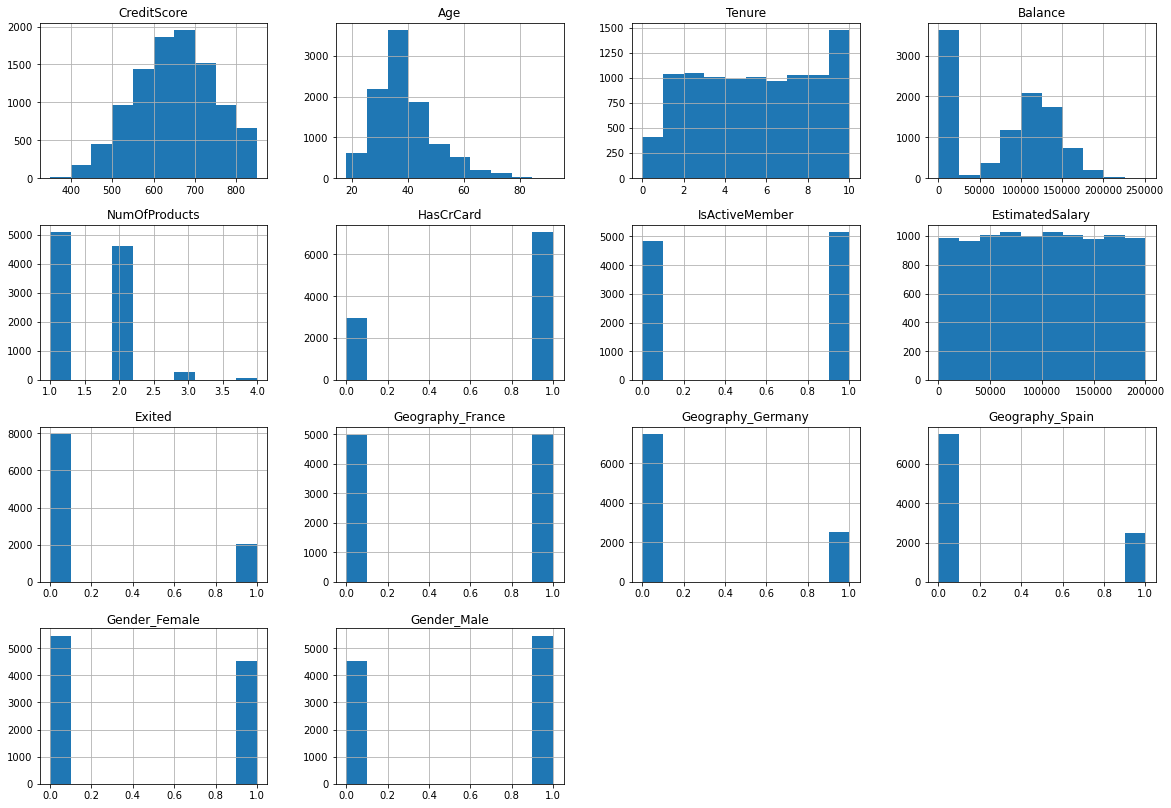

In [73]:
df1.hist(figsize=(20,14)) # no outliers

# Heatmap Visualization

<AxesSubplot:>

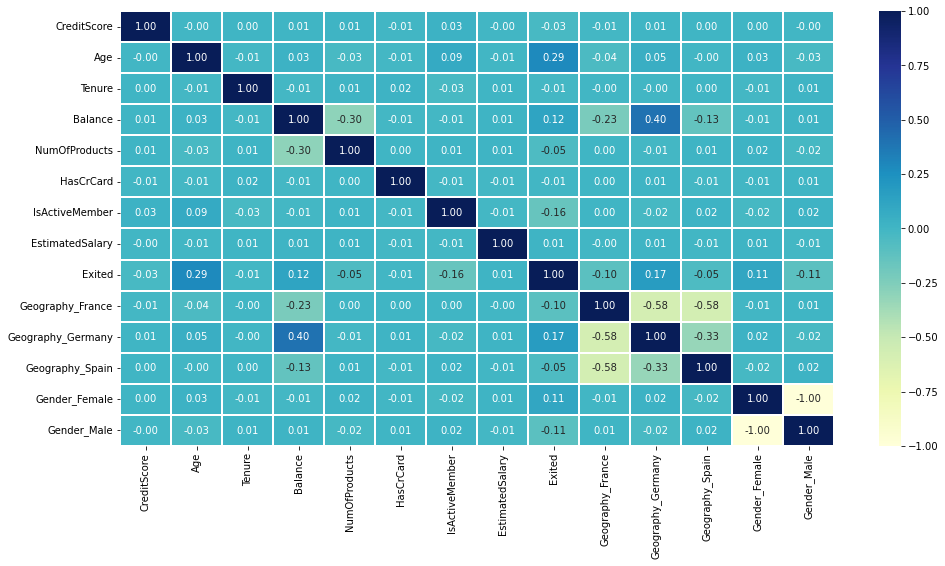

In [20]:
plt.rcParams['figure.figsize'] = (16,8)
sns.heatmap(df1.corr(), cmap='YlGnBu', linewidths = 2, vmin=-1, vmax=1, fmt='.2f', annot=True)

# Pairplot Visualization

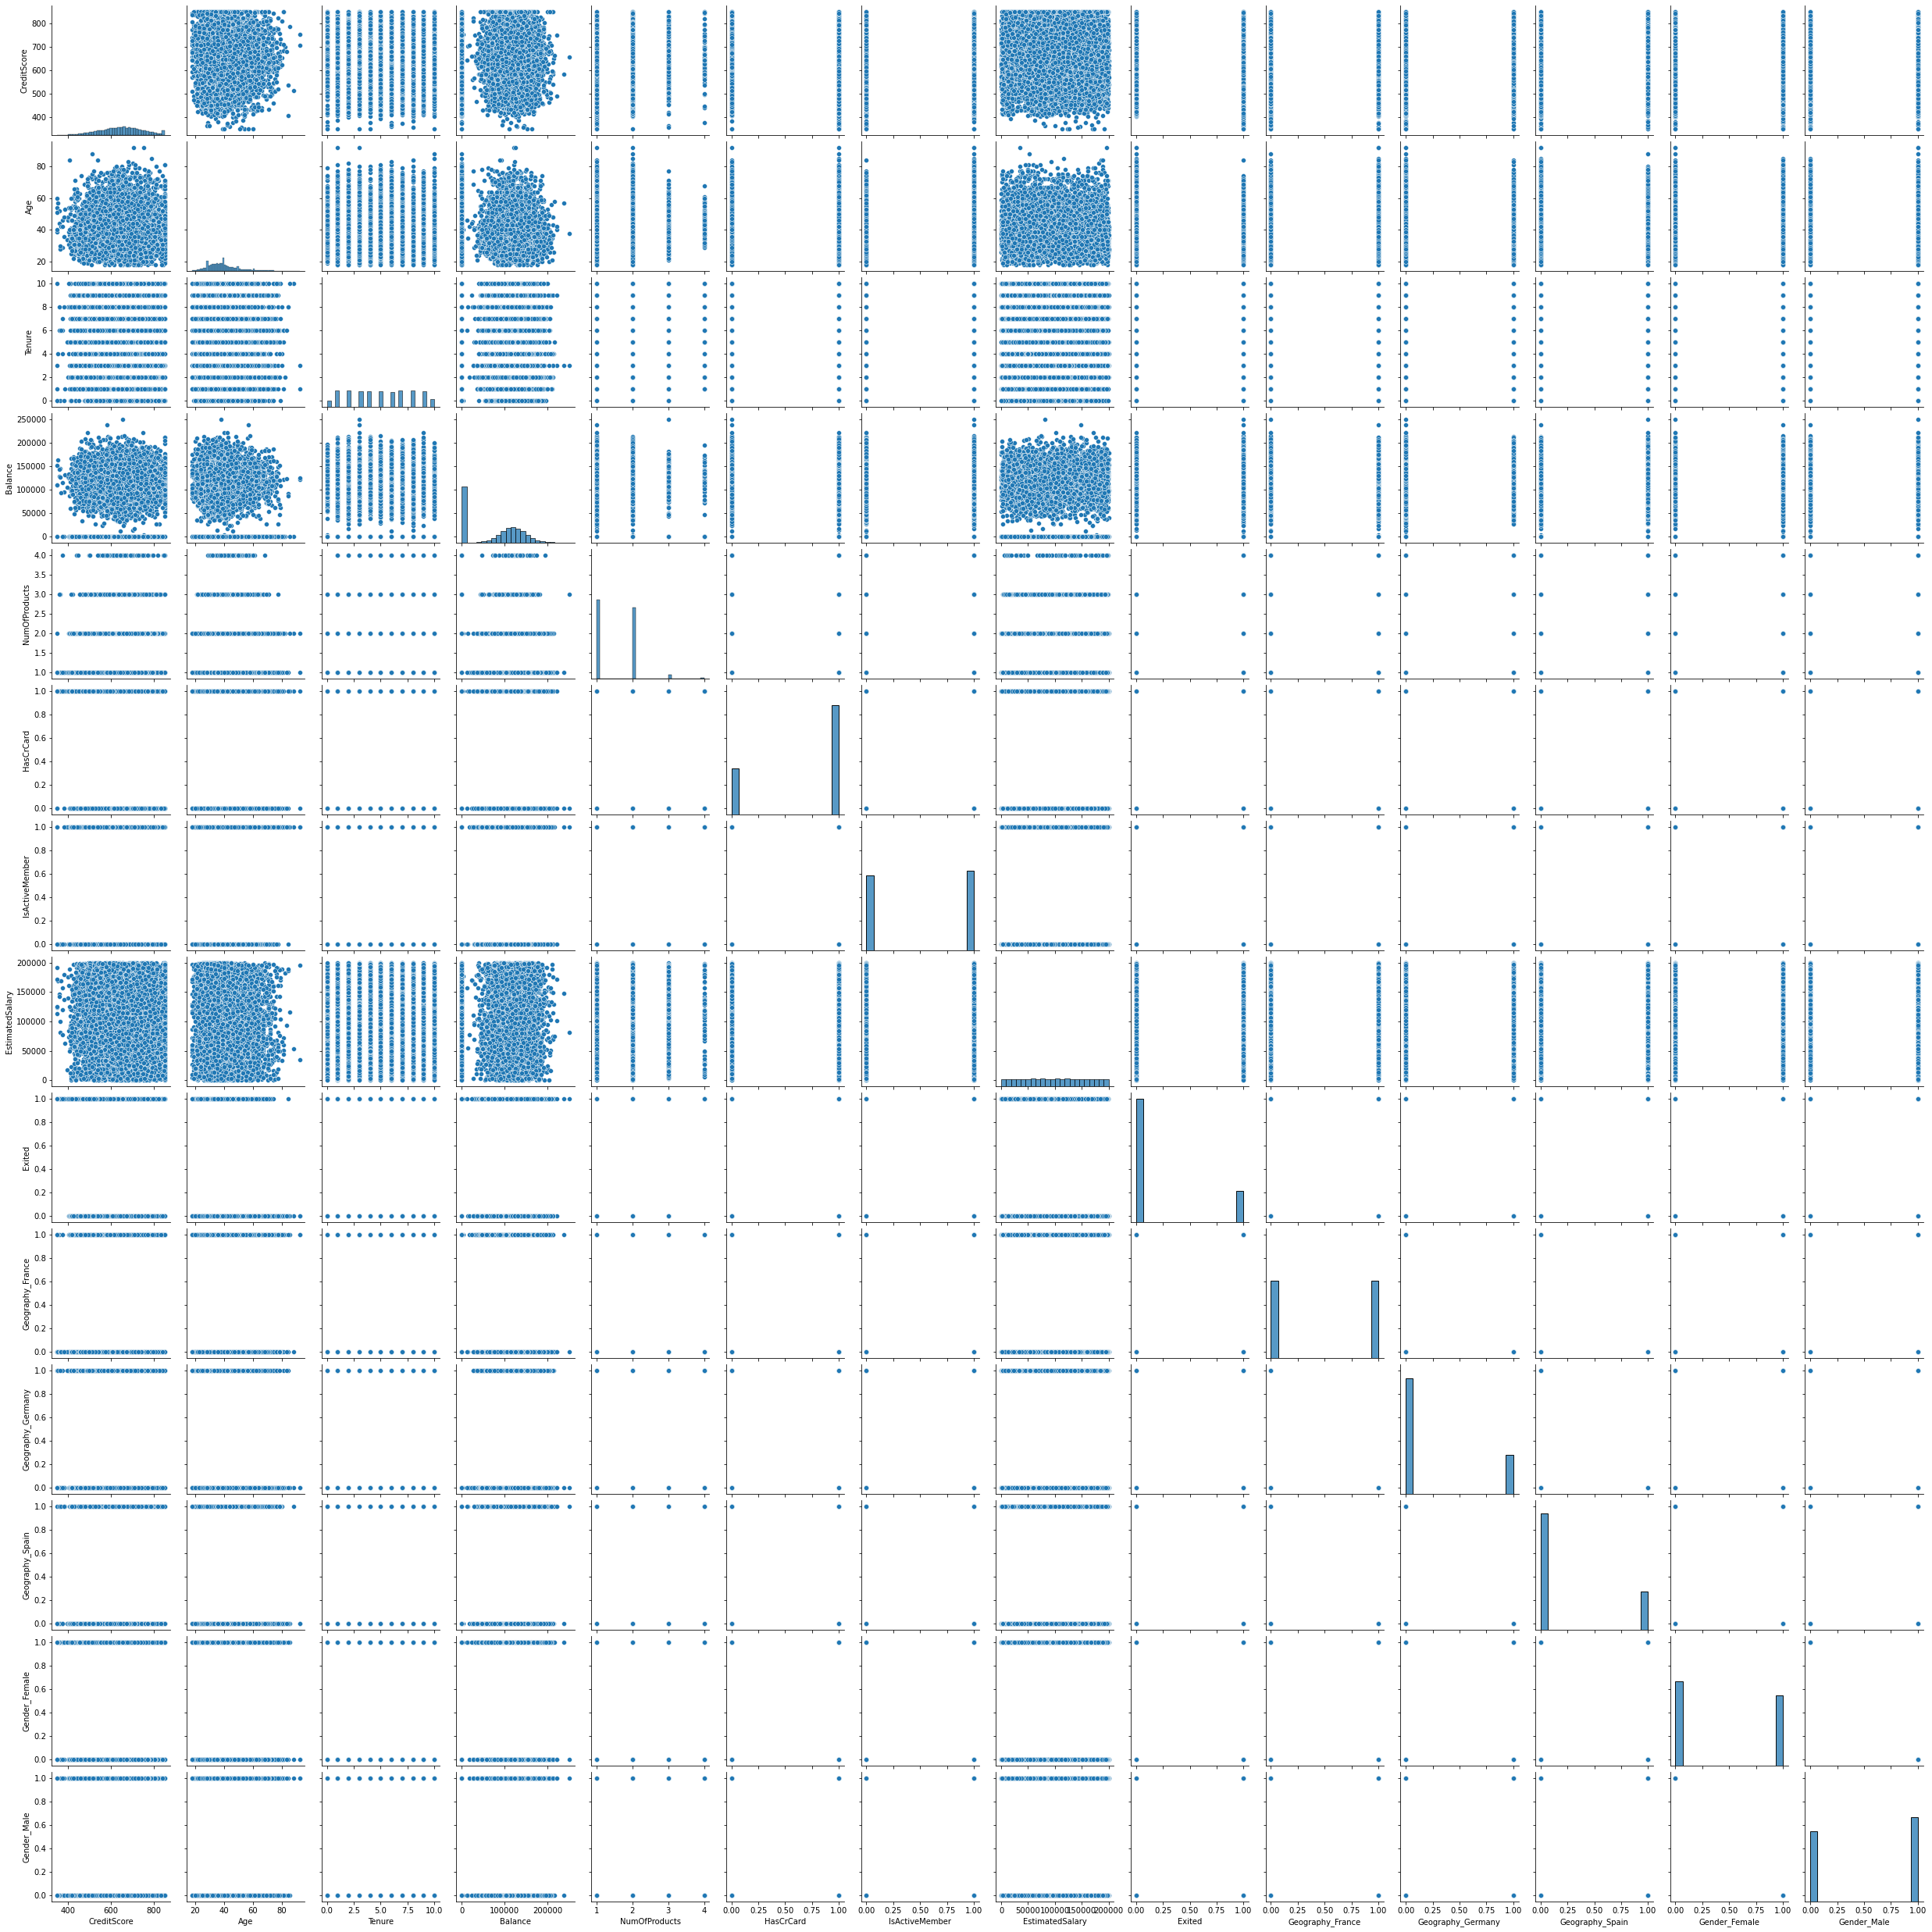

In [24]:
sns.pairplot(df1)

# Age ,Balance, isActiveMember , Gerography and Gender


# It is noted that pairplot charts for all variables is not feasible once the number of variables gets too large
Therefore furture exploring using 2 parameters box plots and count plot to identify possible relationship.

# Boxplot of Exited against Credit Score

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

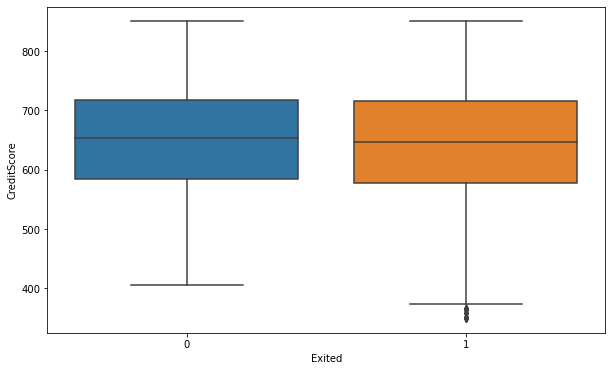

In [48]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="CreditScore", data=df1)
plt.show()

# From pairplot; Creditscore has a small negative corelation of -0.03 with Exited.

# Boxplot of Exited against Age

<AxesSubplot:xlabel='Exited', ylabel='Age'>

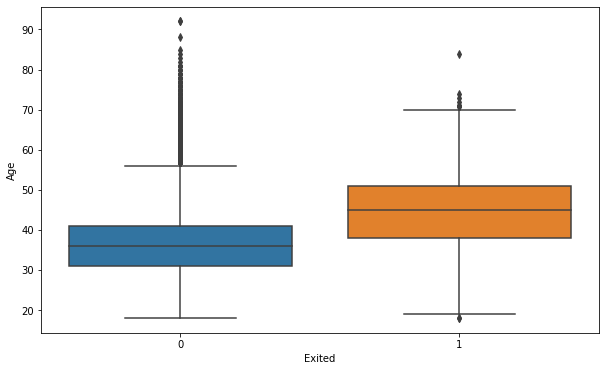

In [45]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="Age", data=df1)
plt.show()

# Together with pairplot ; it is noted Age has a postive corelation of 0.29 with Exited. 
# It is also reflected in the higher Age mean of the boxplot.

# Boxplot of Exited against Tenure

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

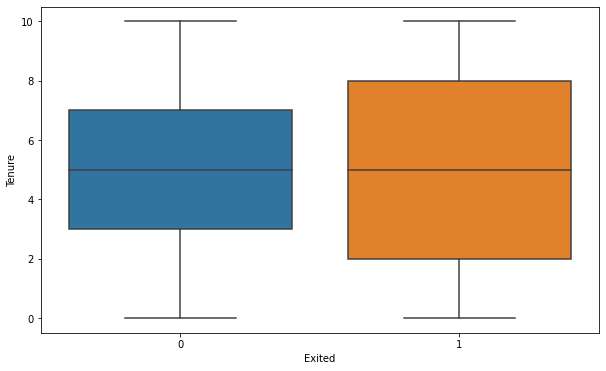

In [47]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="Tenure", data=df1)
plt.show()

# People who exited are those who has longer or shorter tenture than average. Important to note.


# Boxplot of Exited against Balance

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

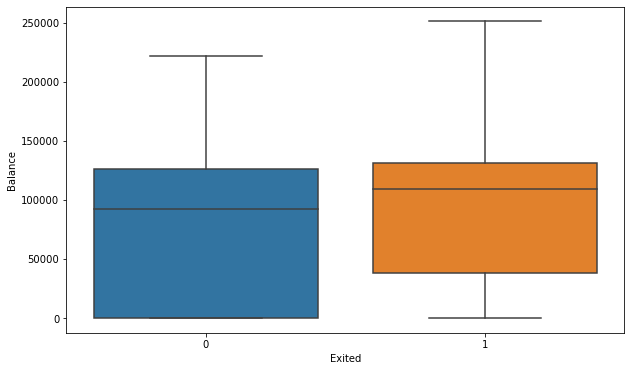

In [49]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="Balance", data=df1)
plt.show()

# Those who left have a higher mean of balance.
# Pairplot shows Balance has a positive corelation of 0.12 with Exited.

# Boxplot of Exited against NumOfProducts

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

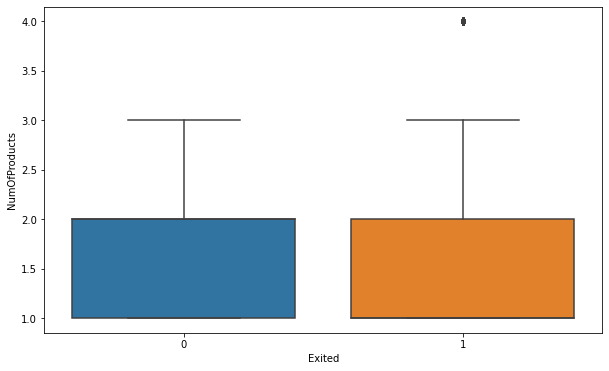

In [60]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="Exited", y="NumOfProducts", data=df1)
plt.show()

# Pairplot shows negative corelation -0.05 with Exited.


# Boxplot of Exited against HasCrCard

Text(0.5, 1.0, 'HasCrCard vs count')

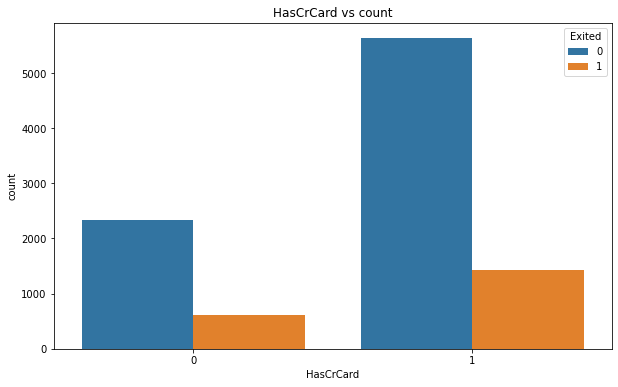

In [61]:
fig = plt.figure(figsize=(10,6)) 
sns.countplot(x="HasCrCard", hue="Exited", data=df1).set_title("HasCrCard vs count")


# Boxplot of Exited against IsActiveMember

Text(0.5, 1.0, 'IsActiveMember vs count')

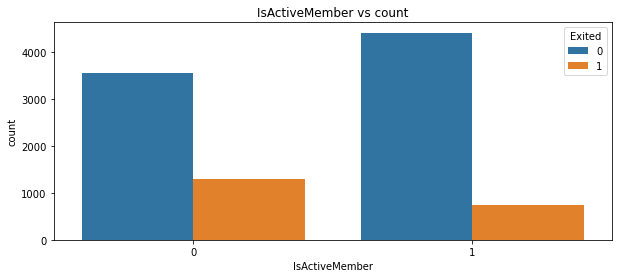

In [87]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(x="IsActiveMember", hue="Exited", data=df1).set_title("IsActiveMember vs count")

# Pairplot shows IsActiveMenber has negative corelation -0.16 with Exited.

# Boxplot of Exited against EstimatedSalary

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

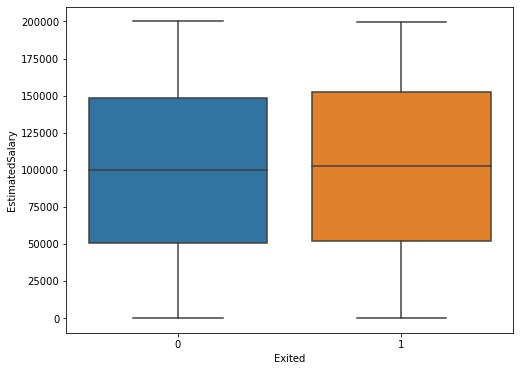

In [58]:
fig = plt.figure(figsize=(10,6)) 

sns.boxplot(x="Exited", y="EstimatedSalary", data=df1)
plt.show()



# Boxplot of Exited against Geography

Text(0.5, 1.0, 'Geography vs count')

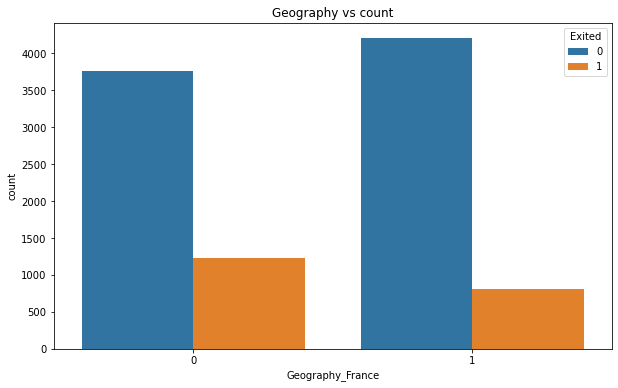

In [67]:
fig = plt.figure(figsize=(10,6)) 
sns.countplot(x="Geography_France", hue="Exited", data=df1).set_title("Geography_France vs count")

Text(0.5, 1.0, 'Geography vs count')

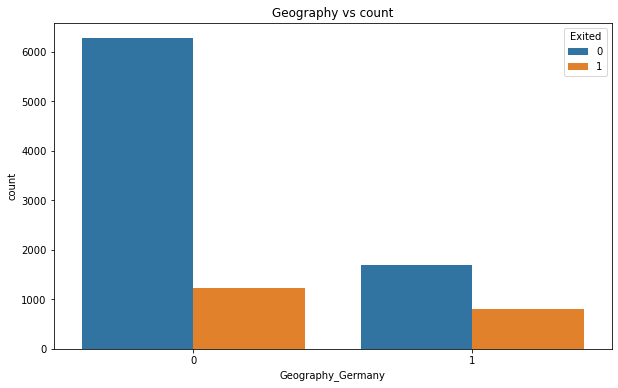

In [68]:
fig = plt.figure(figsize=(10,6)) 
sns.countplot(x="Geography_Germany", hue="Exited", data=df1).set_title("Geography_Germany vs count")

Text(0.5, 1.0, 'Geography vs count')

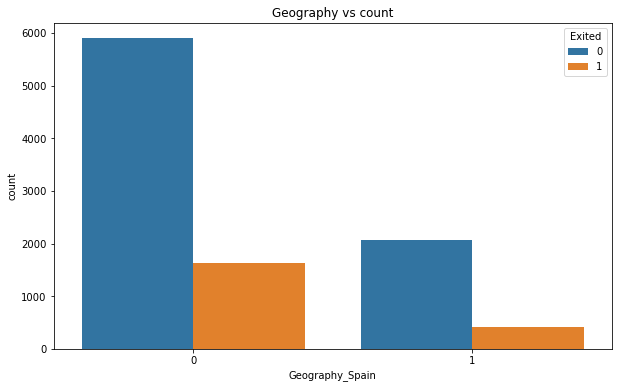

In [69]:
fig = plt.figure(figsize=(10,6)) 
sns.countplot(x="Geography_Spain", hue="Exited", data=df1).set_title("Geography_Spain vs count")

In [ ]:
# Geography wise in totality : Germmany has a higher number of customer exiting when compared to France and Spain

# Boxplot of Exited against Gender

Text(0.5, 1.0, 'Gender_Female vs count')

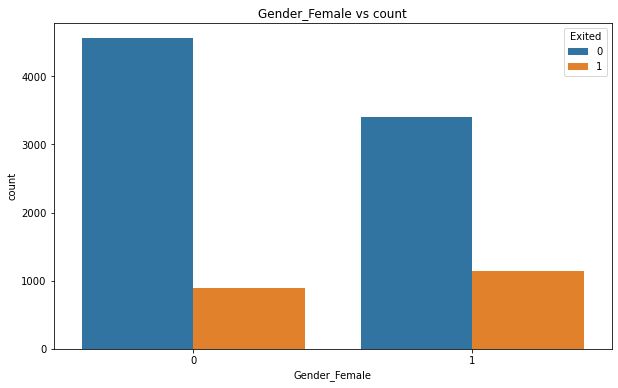

In [70]:
fig = plt.figure(figsize=(10,6)) 
sns.countplot(x="Gender_Female", hue="Exited", data=df1).set_title("Gender_Female vs count")

Text(0.5, 1.0, 'Gender_Male vs count')

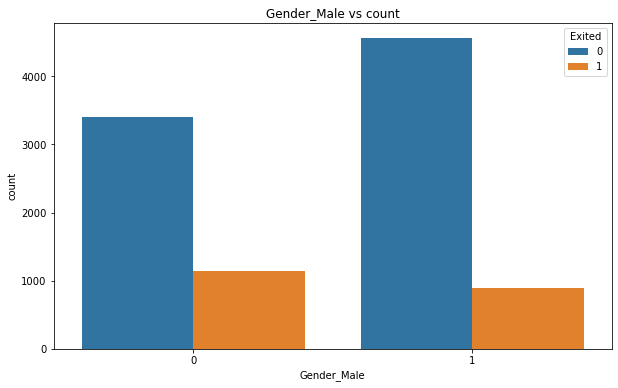

In [71]:
fig = plt.figure(figsize=(10,6)) 
sns.countplot(x="Gender_Male", hue="Exited", data=df1).set_title("Gender_Male vs count")

In [ ]:
# Gender wise in totality : It is interesting that Female are negatively corelated with Exited while Male customer are more liekly to leave.

# Modelling

In [86]:
df1.head()
df1.shape

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


(10000, 14)

# Defining X and y

In [83]:
X = df1.drop(['Exited'], axis=1)
X.head()
X.shape

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


(10000, 13)

In [84]:
y = df1.Exited
y.head()
y.shape

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

(10000,)

# Creating a Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7000, 13) (7000,)
(3000, 13) (3000,)


In [96]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [102]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression

In [110]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy_score(y_test, y_pred)
      

LogisticRegression()

0.8113333333333334

array([[2116,  300],
       [ 272,  312]], dtype=int64)

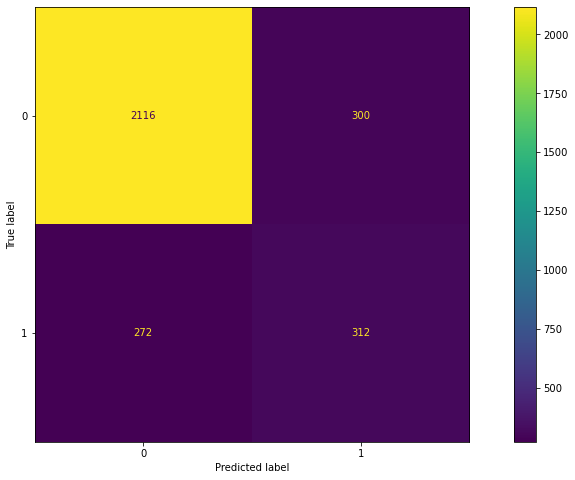

In [111]:
dt_CM = confusion_matrix(y_test, y_pred_dt)
dt_CM
dt_display = ConfusionMatrixDisplay(dt_CM, display_labels = dt.classes_).plot()

# Decision Tree Model

In [113]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_score(y_test,y_pred_dt)

DecisionTreeClassifier()

0.808

array([[2119,  297],
       [ 279,  305]], dtype=int64)

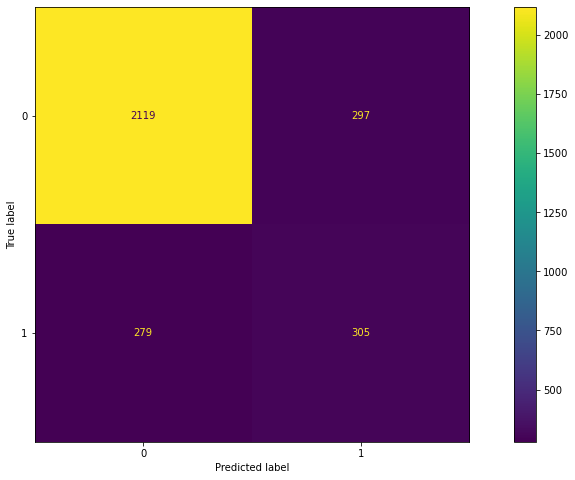

In [114]:
dt_CM = confusion_matrix(y_test, y_pred_dt)
dt_CM
dt_display = ConfusionMatrixDisplay(dt_CM, display_labels = dt.classes_).plot()

# K-Nearest Neighbor Model

In [115]:

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_class))

KNeighborsClassifier(n_neighbors=50)

0.8276666666666667


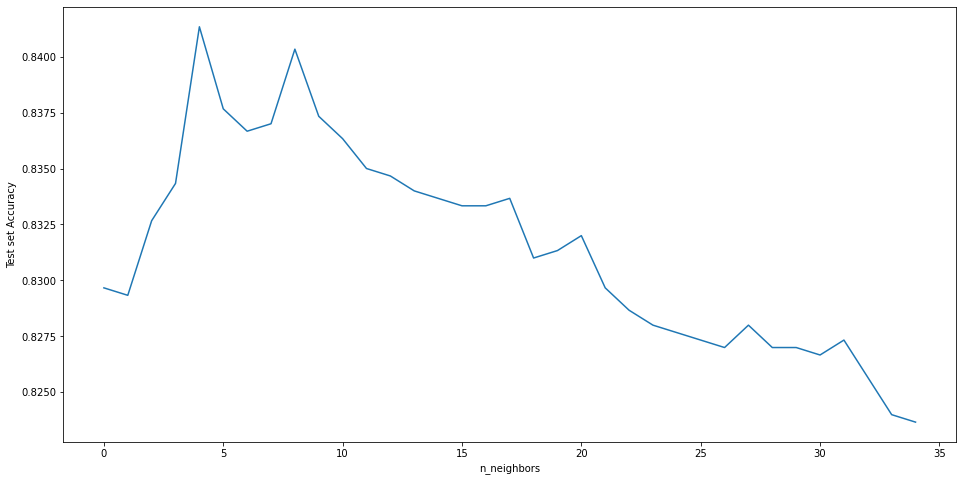

In [119]:
scores = []

for n in range(2,70+1,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    _ = knn.fit(X_train, y_train) # _ this is to mute the output
    y_pred_class = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_class))
    
_ = plt.plot(scores)                                       #_ to mute the outputs
#_ = plt.xticks(ticks=range(10),labels=range(2,50+1,4))     #_ to mute the outputs
_ = plt.xlabel('n_neighbors')
_ = plt.ylabel('Test set Accuracy')




# Summary

Applied three models (Logistic regression , Decision Tree and K-Nearest Neighbour) to predict bank customer churn. 
  
It is noted that without tuning , KNN has the best accuracy. (KNN: 0.827 ; Logistic regression: 0.811 ; Decision Tree : 0.808)

After tuning for the best number of n,  KNN 's model accuracy improved from 0.827 to approximately 0.84.

It is noted that KNN's accuracy does not increases with number of n; there is a need to find the optimal n throught testing.

It is noted that accuracy dropped whe using test_size=0.2 instead of test_size=0.3.

For further model improvements, i can test with the " Random Forest" Model , applying grid search to tune parameter such as " max_depth" , "min_samples_leaf", "min_smaples_split"  

